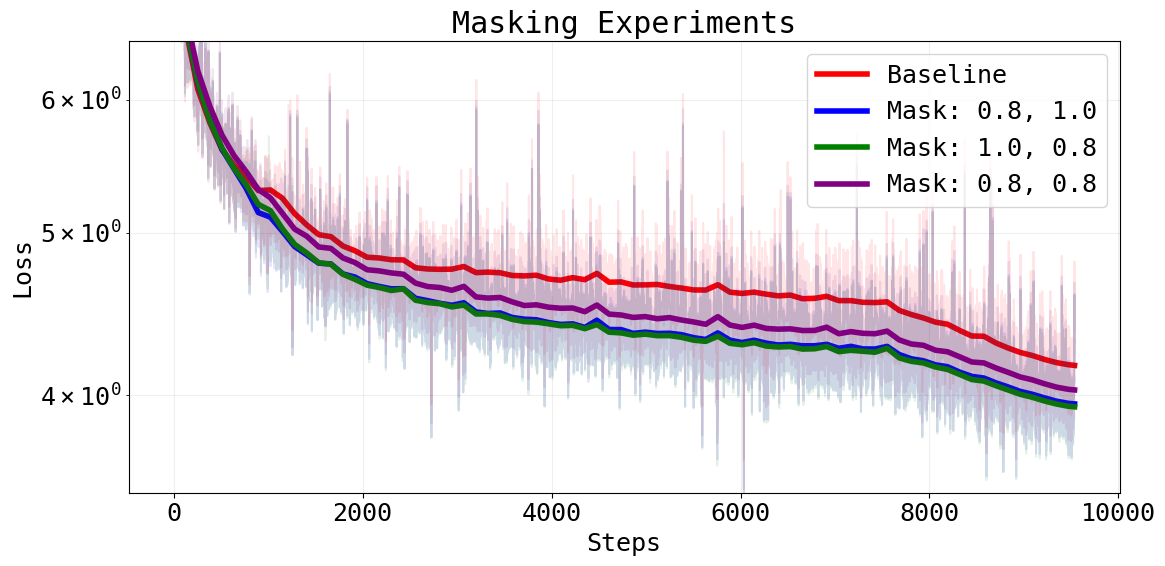

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import re

def parse_log_file(file_path):
    steps, train_loss, val_steps, val_loss = [], [], [], []
    with open(file_path, 'r') as f:
        for line in f:
            match = re.match(r's:(\d+) (trl|tel):(\d+\.\d+)', line.strip())
            if match:
                step, loss_type, loss = int(match.group(1)), match.group(2), float(match.group(3))
                if loss_type == 'trl':
                    steps.append(step)
                    train_loss.append(loss)
                else:
                    val_steps.append(step)
                    val_loss.append(loss)
    return np.array(steps), np.array(train_loss), np.array(val_steps), np.array(val_loss)

def smooth_moving_average(signal, window_size):
    if signal.ndim != 1:
        raise ValueError("smooth_moving_average only accepts 1D arrays.")
    if signal.size < window_size:
        raise ValueError("Input vector needs to be bigger than window size.")
    if window_size < 3:
        return signal

    s = np.pad(signal, (window_size//2, window_size-1-window_size//2), mode='edge')
    w = np.ones(window_size) / window_size
    smoothed_signal = np.convolve(s, w, mode='valid')
    return smoothed_signal

plt.figure(figsize=(12, 6))
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = 18

colors = ['red', 'blue', 'green', 'purple']
labels = ['Baseline', 'Mask: 0.8, 1.0', 'Mask: 1.0, 0.8', 'Mask: 0.8, 0.8']

for exp, color, label in zip(range(1, 5), colors, labels):
    log_file = glob.glob(f"pylog124M_exp{exp}/*.log")[0]
    steps, train_loss, val_steps, val_loss = parse_log_file(log_file)
    
    # Plot training loss
    plt.plot(steps, train_loss, color=color, alpha=0.1)
    
    # Plot validation loss
    if len(val_loss) > 0:
        plt.plot(val_steps, val_loss, color=color, alpha=1.0, linewidth=4, label=f'{label}')

plt.xlabel('Steps')
plt.ylabel('Loss')
plt.yscale('log')
plt.ylim(3.5, 6.5)
plt.title('Masking Experiments')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.tight_layout()
plt.show()